# Working with natural language processing

A short introduction to the package `nltk`, which is described in full-length in the website [nltk.org/book](http://www.nltk.org/book).

In [2]:
import nltk
from nltk import word_tokenize, FreqDist
import pandas as pd
import matplotlib.pylab as plt

If you get package errors, that data is missing, you can use `nltk.download()` to get them.

In [4]:
#nltk.download('stopwords')

In [9]:
data = pd.read_hdf('./data/df_tucholsky.hd5')

Sort data by publication year

In [10]:
data = data.sort_values('year')

Select subset of texts containing "Krieg" as a separate word.

In [11]:
subset = data[data.text.str.contains('\sKrieg\s')]

We have around 200 texts.

In [12]:
subset.shape

(230, 4)

Create a list of transformed texts and word frequencies.

In [13]:
allTexts = [] 
for i,row in subset.iterrows():
    name = "{0} ({1})".format(row['title'],row['year'])
    tokens = word_tokenize(row['text'])
    text = nltk.Text(tokens,name)
    fdist = FreqDist(text)
    allTexts.append([text, fdist])

Lets have a look at one specific text. Since the list `allTexts`contains elements of lists we can define the values for text and frequency distribution as follows

In [14]:
text5, fdist5 = allTexts[5]

Running the code cell with only the `text5` variable, will print the title and year.

In [15]:
text5

<Text: Macchiavelli (1918)>

Test the `concordance(WORD)` and other functions with some words
  - Concordance of "Krieg", "Politik", "Ethik"
  - Similar of "Politik"
  - Common context of "Politik" and "Ethik"

In [16]:
text5.concordance()

TypeError: concordance() missing 1 required positional argument: 'word'

We can check which words have a similar context by using `similar(WORD)`

In [17]:
text5.similar()

TypeError: similar() missing 1 required positional argument: 'word'

Related to the `similar()` function, we can check for `common_contexts([WORD1, WORD2])`.

In [18]:
text5.common_contexts([WORD,WORD])

NameError: name 'WORD' is not defined

The function `collocations()` gives groups of words, that often occure together.

In [19]:
text5.collocations()

aus dem; zur Gewalt; diesem Kriege; göttliche Recht; besorgt hat; Das
ist; ist keine; darf man; dem Volke; dem Vorlesungsverzeichnis; ist
eine; sie unsittlich; weil sie; das göttliche; die Welt;
Vorlesungsverzeichnis der; der Menge; der Sittenlehre; der
philosophischen; auch nur


To quickly visualize the occurance of words throughout a text, we can use `dispersion_plot([WORD1, WORD2])`.

  - Plot the dispersion of "Krieg", "Politik" and "Ethik"

/home/mvogl/Dokumente/GMPG/Lehre/Books-as-knowledge-reservoirs/env/lib/python3.7/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded " "(please install Tkinter library).")


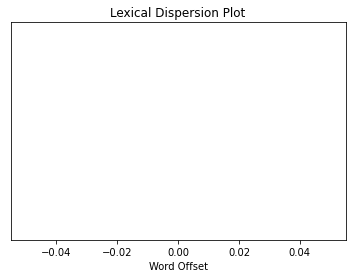

In [20]:
text5.dispersion_plot([])

## Frequency distributions

Frequency distributions describe the number of occurances of words in a text. To find the most common words use `most_common`. This returns a ordered list of words and their occurance in the text. 

In [21]:
fdist5.most_common(20)

[(',', 106),
 ('.', 52),
 ('und', 29),
 ('der', 28),
 ('die', 25),
 ('zu', 24),
 ('ist', 20),
 ('nicht', 19),
 ('es', 16),
 ('das', 15),
 ('Politik', 14),
 ('sie', 14),
 ('den', 13),
 ('?', 13),
 (':', 12),
 ('dem', 10),
 ('–', 10),
 ('Ethik', 10),
 ('in', 10),
 ('man', 8)]

Inputing a specific word gives the number of occurances.

  - Check for "Krieg" and "Politik"

In [22]:
fdist5[]

SyntaxError: invalid syntax (<ipython-input-22-663afc20100e>, line 1)

To find the opposite end, i.e. words which occure only once, we can use `.hapaxes()`. _Hapax legomenon_ are sometimes used to characterize the unknown authors of texts. 

  - Are the a useful candidate for _keywords_ to describe the character of a document? 
  - why? Why not? 

In [ ]:
fdist5.hapaxes()[:20]

Another option for keywords could be a mix of often occuring and long enough words.

  - In the following code, find a combination of length and frequency that gives useful words

In [ ]:
length = 
frequency = 
sorted(w for w in set(text5) if len(w) > length and fdist5[w] > frequency)

Fdist also offers plotting, e.g. to see how the most common words shape the whole text.

In [ ]:
fdist5.plot(50, cumulative=True)

In [ ]:
print(fdist5)

Since there are only around 1200 words in the text, the 50 most common words are building 50 % of the text.

## Bonus: Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) is claimed to be a general law in language, that in any natural language text the frequency of every word is inverse to its rank in the frequency table. This means, that if you order all words of a text by their occurance, and give them a related to their position in the ordered list, a log-log plot of (rank,frequency) should be linear. 

  - Bonus: Reproduce Zipf's law for a given Tucholsky text
  - Hints: 
    - Use matplotlib [scatter plot](https://pythonspot.com/matplotlib-scatterplot/)
    - 'fdist.B' gives the number of bins, i.e. words in a corpus, same as len(fdist)
    - How do you get all the first elements in a list of lists?
    - plt.xscale('log) and plt.yscale('log') set logarithmic scales
  - Bonus II: Write a function returning the plot for any input text, with the text title as plot title
  - Hints: 
    - plt.title(text) sets the title of a plot

In [ ]:
[x[1] for x in LIST]

In [118]:
def plot(inp):
    text = inp[0]
    fdist = inp[1]
    p = plt.plot(range(1,fdist.B() + 1),[x[1] for x in fdist.most_common()])
    plt.xscale('log')
    plt.yscale('log')
    plt.title(text)
    return p

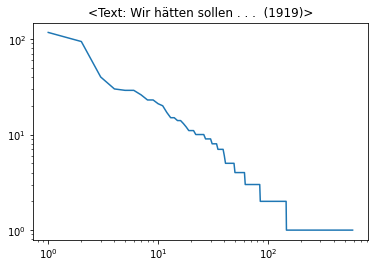

In [119]:
plot(allTexts[10])

In [1]:
from HanTa import HanoverTagger as ht

In [2]:
tagger = ht.HanoverTagger('morphmodel_ger.pgz')

In [41]:
def lemmaNouns(text):
    words = [] 
    sentences = nltk.sent_tokenize(text,language='german')
    sentences_tok = [nltk.tokenize.word_tokenize(sent) for sent in sentences]
    for sent in sentences_tok:
        tags = tagger.tag_sent(sent) 
        words_from_sent = [lemma for (word,lemma,pos) in tags]
        words.extend(words_from_sent)

    return words

In [43]:
data.text.iloc[10]

'\n\n                              Die Romantik des Geschmacklosen\n\n                              Das Essaybuch von Max Brod ›Die Schönheit der häßlichen Bilder‹ (das von Kurt Wolff in Leipzig verlegt ist) erscheint mir als das beste seiner letzten Bücher. Da sind alle die Arbeiten gesammelt, die zerstreut herauskamen und unser Entzücken erregten. (Viele haben in der ›Schaubühne‹ gestanden.)\nDen Titel hat das Buch, weil die meisten Aufsätze sich liebevoll damit befassen, die untergehende Geschmacklosigkeit als romantisch, als abwegig, als etwas nicht Alltägliches hinzustellen. Es gibt von Max Brod ein wundervolles Gedicht in dem schönen Bande ›Der Weg des Verliebten‹. Da steht drin, daß in einem Lande, wo Wunder, Helden und Fehden, Satansmessen und Vampyre an der Tagesordnung sind, die Romantiker einsam im Gebirge wohnen und ihrerseits ein Land erfunden haben, »von dem sie schwärmen. Dort gibts saure Weine, Hausbälle, Ehen, sogar Singvereine.« Das ist es. Wie hat er das rührende ste

In [42]:
lemmaNouns(data.text.iloc[10])

['die',
 'Romantik',
 'des',
 'geschmacklos',
 'das',
 'Essaybuch',
 'von',
 'Max',
 'Brod',
 '›die',
 'Schönheit',
 'der',
 'häßlich',
 'Bilder‹',
 '--',
 'das',
 'von',
 'Kurt',
 'Wolff',
 'in',
 'Leipzig',
 'verlegen',
 'sein',
 '--',
 'erscheinen',
 'mir',
 'als',
 'das',
 'gut',
 'sein',
 'letzter',
 'Buch',
 '--',
 'da',
 'sein',
 'alle',
 'die',
 'Arbeit',
 'sammeln',
 '--',
 'die',
 'zerstreuen',
 'herauskommen',
 'und',
 'unser',
 'Entzücken',
 'erregen',
 '--',
 '--',
 'viele',
 'haben',
 'in',
 'der',
 '›schaubühne‹',
 'stehen',
 '--',
 '--',
 'den',
 'Titel',
 'haben',
 'das',
 'Buch',
 '--',
 'weil',
 'die',
 'meisten',
 'Aufsatz',
 'sich',
 'liebevoll',
 'damit',
 'befassen',
 '--',
 'die',
 'untergehend',
 'Geschmacklosigkeit',
 'als',
 'romantisch',
 '--',
 'als',
 'abwegig',
 '--',
 'als',
 'etwas',
 'nicht',
 'alltäglich',
 'hinstellen',
 '--',
 'es',
 'geben',
 'von',
 'Max',
 'Brod',
 'ein',
 'wundervoll',
 'Gedicht',
 'in',
 'dem',
 'schön',
 'Bande',
 '›der',
 'We